In [1]:
import pandas as pd

df = pd.read_csv('/home/jovyan/data/trainLabels.csv')
df.Class.value_counts()

2    2942
1    2478
0    1541
7    1228
8    1013
5     751
3     475
6     398
4      42
Name: Class, dtype: int64

In [24]:
import pandas as pd
from matplotlib import pyplot as plt

for i in range(1, 5):
    trunc_limit = float(i/10)
    print(f'Trunc limit: {trunc_limit} MB')

    df = pd.read_csv('/home/jovyan/data/trainLabels.csv')
    total = df.shape[0]
    print(f'  Total de arquivos: {total}')

    df = df[df['Size'] > trunc_limit*1024**2]
    trunc = df.shape[0]
    print(f'  Arquivos truncados: {trunc} ({round(100*trunc/total)}%)')

Trunc limit: 0.1 MB
  Total de arquivos: 10868
  Arquivos truncados: 7577 (70%)
Trunc limit: 0.2 MB
  Total de arquivos: 10868
  Arquivos truncados: 6340 (58%)
Trunc limit: 0.3 MB
  Total de arquivos: 10868
  Arquivos truncados: 5760 (53%)
Trunc limit: 0.4 MB
  Total de arquivos: 10868
  Arquivos truncados: 5346 (49%)


<AxesSubplot:title={'center':'Frequência de tamanho dos arquivos'}, ylabel='Tamanho (MB)'>

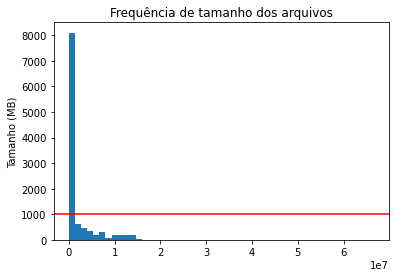

In [22]:
import pandas as pd
from matplotlib import pyplot as plt

df = pd.read_csv('/home/jovyan/data/trainLabels.csv')

plt.hist(df['Size'], bins=50)
# plt.xlabel('Índice')
plt.axhline(y=1000, color='r', linestyle='-')
plt.ylabel('Tamanho (MB)')
plt.title('Frequência de tamanho dos arquivos')
plt.gca()
# plt.savefig('/home/jovyan/code/img/hist_arquivos.png', dpi=300, facecolor=(1.0, 1.0, 1.0, 1.0))



# Distribuição de arquivos por classe

               0          1  Class
0     -28.797852 -21.741920      0
1     -44.167171   8.666601      0
2      -2.590843 -42.076263      0
3     -23.169815  -2.805445      0
4       8.040119 -37.032173      0
...          ...        ...    ...
10863 -72.722977   5.124970      8
10864 -76.286919  19.423351      8
10865 -72.011688  18.447342      8
10866  57.190506 -40.216675      8
10867 -23.183849  -1.099147      8

[10868 rows x 3 columns]


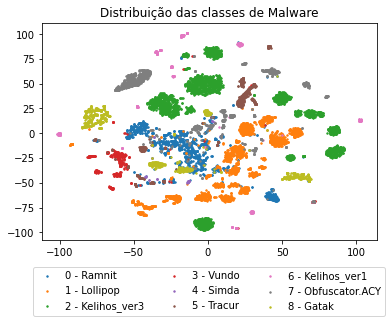

In [143]:
import pickle
import pandas as pd
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

CLASSES = ['Ramnit','Lollipop', 'Kelihos_ver3', 'Vundo', 'Simda', 'Tracur', 'Kelihos_ver1', 'Obfuscator.ACY', 'Gatak']
prefix = 'v3/g1_ms0_mf10_f1'

df_labels = pd.read_csv('/home/jovyan/data/trainLabels.csv')
df_labels.drop(columns='Size', inplace=True)
df_labels.set_index('Id', inplace=True)
# print(df_labels)

with open(f'/home/jovyan/data/tfidf-{prefix}_X_train.pkl', 'rb') as f:
    df_X_train = pickle.load(f)
    
with open(f'/home/jovyan/data/tfidf-{prefix}_X_test.pkl', 'rb') as f:
    df_X_test = pickle.load(f)
    
df_X = pd.concat([df_X_train, df_X_test])
df_X.fillna(0, inplace=True)

df_X = pd.merge(df_X, df_labels, left_index=True, right_index=True)
df_X.reset_index(inplace=True)
# print(df_X)
    
df_X_toreduce = df_X.drop(columns=['index', 'Class'])
# print(df_X_toreduce)
X_reduced = TSNE(n_components=2, learning_rate='auto', init='random').fit_transform(df_X_toreduce)
df_X_reduced = pd.DataFrame(X_reduced)
# print(df_X_reduced)
df_X_reduced['Class'] = df_X['Class']
print(df_X_reduced)

# plt.figure()
for i in range(8+1):
    # print(f'Class {i}')
    df_class = df_X_reduced.loc[df_X_reduced['Class'] == i]
    # print(df_class.shape)
    
    plt.scatter(df_class[0], df_class[1], s=2, label=f'{i} - {CLASSES[i]}')

plt.title('Distribuição das classes de Malware')
plt.legend(loc='upper center', ncol=3, bbox_to_anchor=(0.5, -0.1))
plt.gca()
plt.savefig(f"/home/jovyan/data/img/ia_classes_{prefix.replace('/', '_')}.png", dpi=300, facecolor=(1.0, 1.0, 1.0, 1.0), bbox_inches='tight')

                            00        8b        dd       eax       ecx  \
0DNVFKwYlcjO7bTfJ5p1  0.378700  0.274283  0.010243  0.376308  0.264959   
0H63jydvIahOVqgx5Kfo  0.621040  0.129856  0.033251  0.288715  0.079110   
0yBQ5dAc2gN4qx9YWuiS  0.632141  0.256948  0.006700  0.313568  0.273319   
1aAwe4J9VHrsq8uEoZhf  0.352552  0.248890  0.008665  0.429751  0.211330   
1d485UYC6qhXKrAcDJPZ  0.521271  0.244158  0.002532  0.396147  0.261484   
...                        ...       ...       ...       ...       ...   
Jgs4hRrYEy71SbtAfWwN  0.915480  0.072510  0.352313  0.000000  0.000000   
JM34WTehCb9VuiQEgr7K  0.703292  0.141565  0.001023  0.311508  0.149853   
JSYxG6FyPnqQzEp73B9e  0.699198  0.148677  0.003222  0.307174  0.166505   
kG29BLiFYPgWtpb350sO  0.914930  0.078619  0.354216  0.000000  0.000000   
KGorN9J6XAC4bOEkmyup  0.730410  0.117660  0.002254  0.347406  0.123223   

                            ff       loc       mov      push       sub  
0DNVFKwYlcjO7bTfJ5p1  0.261777  0.2887

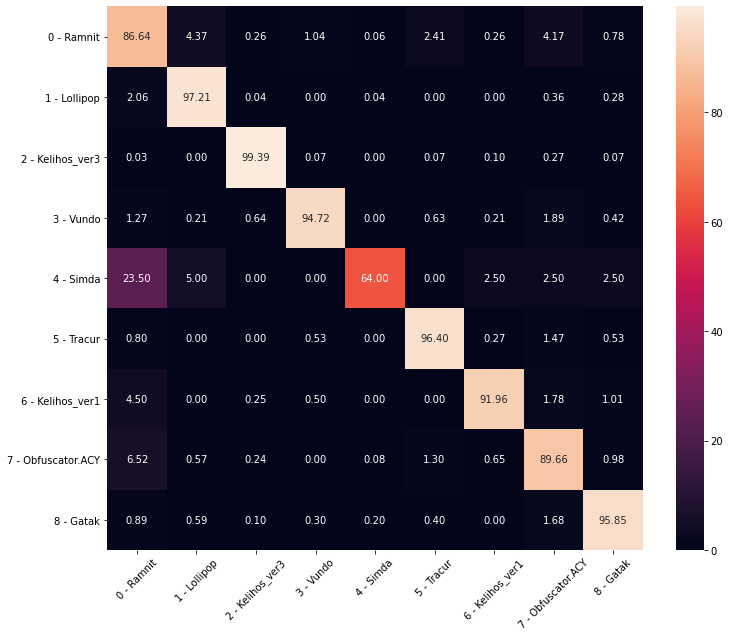

In [34]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

import seaborn as sns

CLASSES = ['Ramnit','Lollipop', 'Kelihos_ver3', 'Vundo', 'Simda', 'Tracur', 'Kelihos_ver1', 'Obfuscator.ACY', 'Gatak']
labels = [f'{i} - {c}' for i, c in enumerate(CLASSES)]

cmn_list = []
for i in range(1,10+1):
    prefix = f'v2/g1_ms0.5_mf10_f{i}'

    with open(f'/home/jovyan/data/tfidf-{prefix}_model.pkl', 'rb') as f:
        model = pickle.load(f)

    with open(f'/home/jovyan/data/tfidf-{prefix}_X_test.pkl', 'rb') as f:
        X_test = pickle.load(f)

    with open(f'/home/jovyan/data/tfidf-{prefix}_Y_test.pkl', 'rb') as f:
        Y_test = pickle.load(f)


    Y_pred = model.predict(X_test, verbose=None)
    y_pred = Y_pred.argmax(1)
    y_test = Y_test.argmax(1)

    cm = confusion_matrix(y_test, y_pred)
    cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    cmn_list.append(cmn)
    
print(X_test)
    
cmn_avg = 100*sum(cmn_list)/len(cmn_list)
    
fig, ax = plt.subplots(figsize=(12,10))
sns.heatmap(cmn_avg, annot=True, fmt='.2f', xticklabels=labels, yticklabels=labels)
# plt.ylabel('Actual')
# plt.xlabel('Predicted')
plt.xticks(rotation=45)
plt.gca()
plt.savefig(f"/home/jovyan/data/img/ia_cmatrix_{prefix.replace('/', '_')}.png", dpi=300, facecolor=(1.0, 1.0, 1.0, 1.0))